In [1]:
#https://www.kaggle.com/hely333/eda-regression
# Predicting the cost of the treatment

In [1]:
# import the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file

df=pd.read_csv('insurance.csv')
df.shape

(1338, 7)

In [4]:
# see the data

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#smoker or not
#0 --> not smoker(no) and 1-->smoker(yes)
le.fit(df.smoker.drop_duplicates())
df.smoker=le.transform(df.smoker)

#sex male or female
# 0 --> female and 1-->male
le.fit(df.sex.drop_duplicates())
df.sex=le.transform(df.sex)

#region
le.fit(df.region.drop_duplicates())
df.region=le.transform(df.region)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
corr=df.corr()

In [10]:
#find correlation of charges with all other column
df.corr()['charges'].sort_values()

#we observe that smoker , age is highly correalted

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

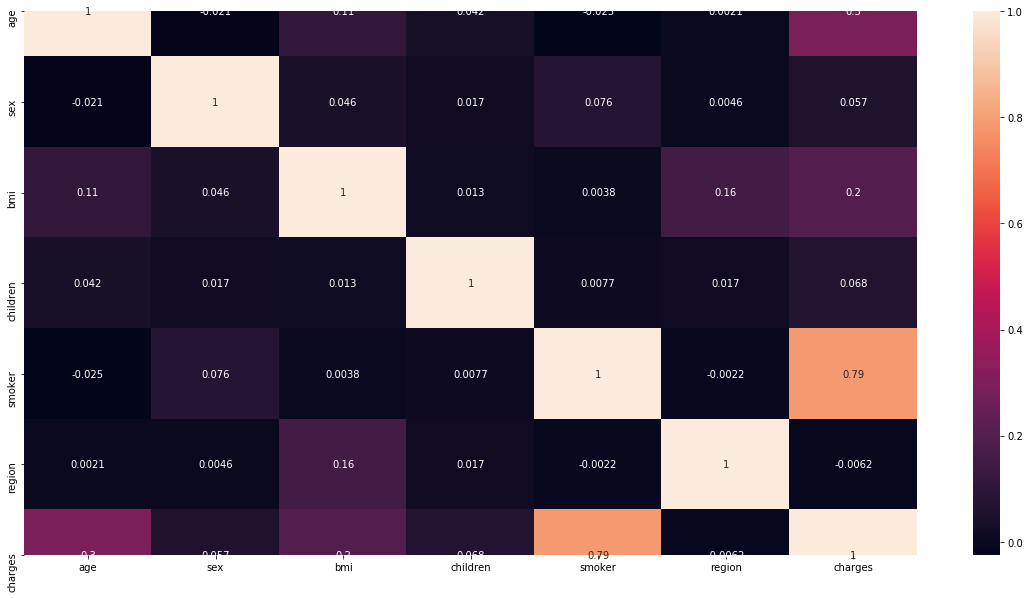

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True);

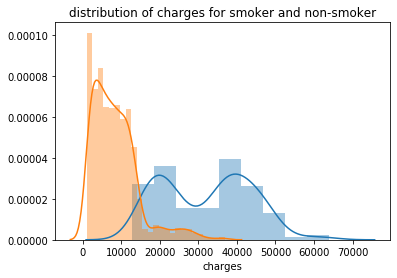

In [12]:
# fig,axes=plt.subplots(1,2,figsize=(10,10))
#finds the number of smokers and non smokers
s=sns.distplot(df[(df.smoker==1)]['charges'])
s.set_title('distribution of charges for smoker and non-smoker')
ns=sns.distplot(df[(df.smoker==0)]['charges'])

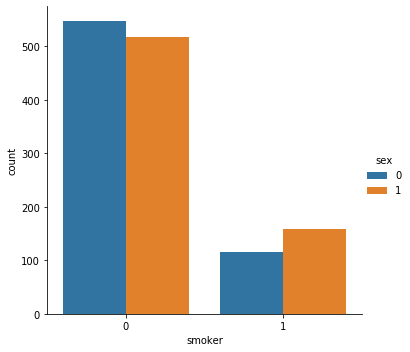

In [13]:
#Smoking patients spend more on treatment. 
#But there is a feeling that the number of non-smoking patients is greater. Going to check it.
sns.catplot(x='smoker',hue='sex',data=df,kind='count')

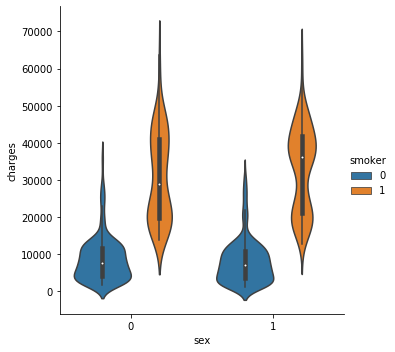

In [14]:
# 1 for men and smoker 
# 0 for women and non
# this violine plot use to describe the probability density od data
sns.catplot(kind='violin',x='sex',y='charges',hue='smoker',data=df)

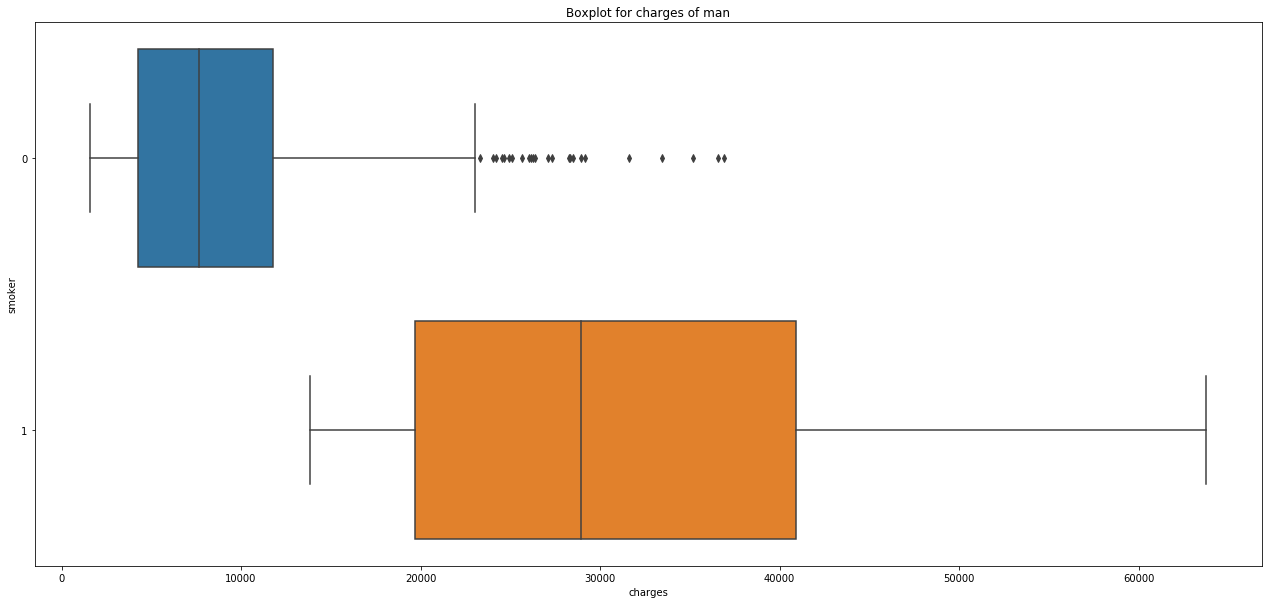

In [15]:
# charges for man 
# used to find the outlier
# outlier is that whose value is more then Q3 i.e. maximum quartile
plt.figure(figsize=(22,10))
plt.title('Boxplot for charges of man')
sns.boxplot(y='smoker',x='charges',data=df[df['sex']==0],orient='h');

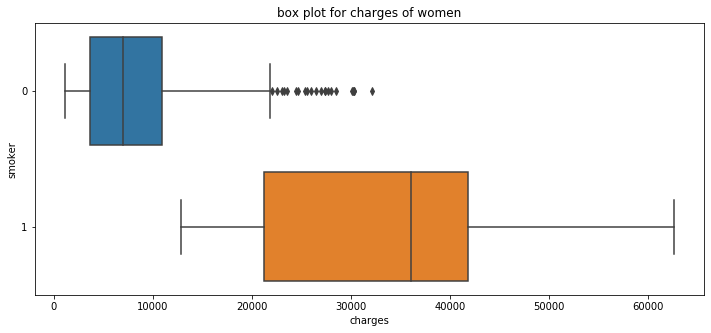

In [16]:
# charges for women

plt.figure(figsize=(12,5))
plt.title('box plot for charges of women')
sns.boxplot(y='smoker',x='charges',data=df[df.sex==1],orient='h')

In [17]:
#Now let's pay attention to the age of the patients. 
#First, let's look at how age affects the cost of treatment, 
#and also look at patients of what age more in our data set.

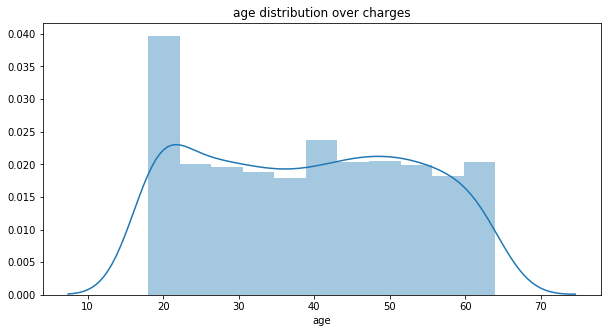

In [18]:
plt.figure(figsize=(10,5))
plt.title('age distribution over charges');
sns.distplot(df['age']);

<Figure size 720x1440 with 0 Axes>

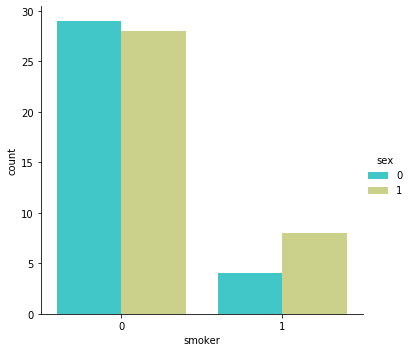

In [19]:
#lets check how many 18 year old are smoker and how many are not smoker

plt.figure(figsize=(10,20))
sns.catplot(x='smoker',hue='sex',kind='count',data=df[df['age']==18],palette='rainbow')

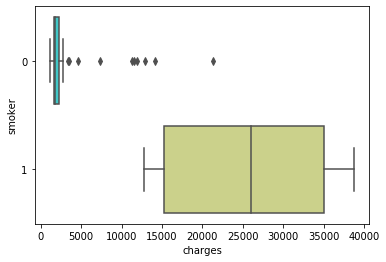

In [20]:
#box plot for charges of 18 year old smokers

sns.boxplot(x='charges',y='smoker',data=df[(df.age==18)],orient='h',palette='rainbow');
# plt.legend()

In [21]:
#it  gives huge result that means smoker pay more insurance charges as compare to non smoker

In [22]:
# lets split target i.e. dependent and independent variable

x=df.drop(['charges'],axis=1)
# x.head()
y=df['charges']
# y.head()

In [23]:
# lets create a model
# import all necessary libraries for creation of linearModel

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [24]:
# split the data into trainig and testing i.e. 70% trainig data and 30% testing data

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# create LinearRegression object and fit the trainig data
lr=LinearRegression().fit(x_train,y_train)

#lets predict the training data
y_train_pred=lr.predict(x_train)

# lets predict the testing data
y_test_pred=lr.predict(x_test)

print("\nintercept",lr.intercept_)
print('\ncoefficient =',lr.coef_)

# now lets find the r2 score i.e. residual socre of both trainig and testing data 
print("\nr2 score of training data i.e. bias value=",r2_score(y_train,y_train_pred))
print("\nr2 score of testing data i.e. variance value=",r2_score(y_test,y_test_pred))

#from the value of both bias and variance we observe that our model is hood to go i.e. both bias = variance = medium
# bias = 0 and variance = high --> overfitted model
# bias = medium and variance = 0 or bias = medium and variance = medium --> bestfitted model
# bias = high and varince = high -->underfitted model


intercept -11661.983908824424

coefficient = [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]

r2 score of training data i.e. bias value= 0.7368306228430945

r2 score of testing data i.e. variance value= 0.799874714544996


In [32]:
# lets check for more accuracy of model by droping some columns  which has huge value difference
# lets drop the column region and do the Polynomial Regression with the degree 2

x=df.drop(['charges','region'],axis=1)
# print(x.head())
y=df['charges']
pf=PolynomialFeatures(2)
# print(x.head())
x_poly=pf.fit_transform(x)
# print(x_poly)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,random_state=0)
lr1=LinearRegression().fit(x_train,y_train)
print('model accuracy {:.2f} '.format(lr1.score(x_test,y_test)))
# print(x_test.shape)

x_poly.shape

# here we go we get best model output with the polynomial degree 2

model accuracy 0.88 


(1338, 21)

In [26]:
# it gives more % accuracy i.e. 88%

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [44]:
# lets cross check our model
# x.shape
x1 = np.array([19,0,27.900,0,1,3]).reshape(1,6)
lr.predict(x1)
x = np.array([28,1,33.000,3,0]).reshape(1,5)
# # x1.shape
f = PolynomialFeatures(2)
x = f.fit_transform(x)
lr1.predict(x)

array([6493.68886959])